# **Most visited country in 2024**

In [9]:
from google.colab import files
upload = files.upload()


Saving most-visited-countries-2024.csv to most-visited-countries-2024.csv


In [10]:
import pandas as pd
df = pd.read_csv('most-visited-countries-2024.csv') #
print(df)



              country  MostVisited_NumOfArrivalsPredictive_Millions_2024  \
0               India                                               17.9   
1               China                                               65.7   
2       United States                                               79.3   
3           Indonesia                                               15.5   
4            Pakistan                                                NaN   
..                ...                                                ...   
198            Monaco                                                NaN   
199  Marshall Islands                                                NaN   
200        San Marino                                                NaN   
201             Palau                                                NaN   
202            Tuvalu                                                NaN   

     MostVisited_NumOfArrivals_Millions_2023  \
0                                      

In [11]:
print(df.head())

         country  MostVisited_NumOfArrivalsPredictive_Millions_2024  \
0          India                                               17.9   
1          China                                               65.7   
2  United States                                               79.3   
3      Indonesia                                               15.5   
4       Pakistan                                                NaN   

   MostVisited_NumOfArrivals_Millions_2023  \
0                                      NaN   
1                                      NaN   
2                                    66.48   
3                                      NaN   
4                                      NaN   

   MostVisited_NumOfArrivals_Millions_2022  \
0                                      NaN   
1                                      NaN   
2                                    50.87   
3                                      NaN   
4                                      NaN   

   MostVisited_NumO

In [12]:
print(df.describe)

<bound method NDFrame.describe of               country  MostVisited_NumOfArrivalsPredictive_Millions_2024  \
0               India                                               17.9   
1               China                                               65.7   
2       United States                                               79.3   
3           Indonesia                                               15.5   
4            Pakistan                                                NaN   
..                ...                                                ...   
198            Monaco                                                NaN   
199  Marshall Islands                                                NaN   
200        San Marino                                                NaN   
201             Palau                                                NaN   
202            Tuvalu                                                NaN   

     MostVisited_NumOfArrivals_Millions_2023  \
0    

In [29]:
import pandas as pd

# Load the dataset
file_path = 'most-visited-countries-2024.csv'  # Update this with your file path
data = pd.read_csv("most-visited-countries-2024.csv")

# 1. Inspect the dataset
print("Initial Data Overview:")
print(data.info())
print(data.head())

# 2. Handle missing values
# Drop rows or columns with excessive missing data
data = data.dropna(thresh=len(data.columns) - 2)  # Keep rows with at least non-null values in most columns
# Fill missing numerical data with the mean or median
data.fillna(data.median(numeric_only=True), inplace=True)
# Fill missing categorical data with the mode
data.fillna(data.mode().iloc[0], inplace=True)

# 3. Rename columns for clarity (if needed)
data.rename(columns={
    'OldColumnName': 'NewColumnName',  # Replace with actual column names
}, inplace=True)

# 4. Remove duplicates
data = data.drop_duplicates()

# 5. Standardize text (e.g., country names)
data['country'] = data['country'].str.strip().str.title()  # Remove extra spaces and standardize case

# 6. Convert data types (if needed)
data['MostVisited_NumOfArrivalsPredictive_Millions_2024'] = pd.to_numeric(
    data['MostVisited_NumOfArrivalsPredictive_Millions_2024'], errors='coerce'
)

# 7. Validate data (e.g., check ranges or unique values)
print("Unique countries:", data['country'].nunique())
print("Summary statistics:")
print(data.describe())

# Save cleaned data to a new file
data.to_csv('most-visited-countries-2024.csv', index=False)

print("Data cleaning complete. Cleaned file saved as 'cleaned_file.csv'.")


Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   country                                            203 non-null    object 
 1   MostVisited_NumOfArrivalsPredictive_Millions_2024  50 non-null     float64
 2   MostVisited_NumOfArrivals_Millions_2023            49 non-null     float64
 3   MostVisited_NumOfArrivals_Millions_2022            20 non-null     float64
 4   MostVisited_NumOfArrivals_WorldBank                202 non-null    float64
 5   MostVisited_DataYear_WorldBank                     202 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.6+ KB
None
         country  MostVisited_NumOfArrivalsPredictive_Millions_2024  \
0          India                                               17.9   
1          China                  

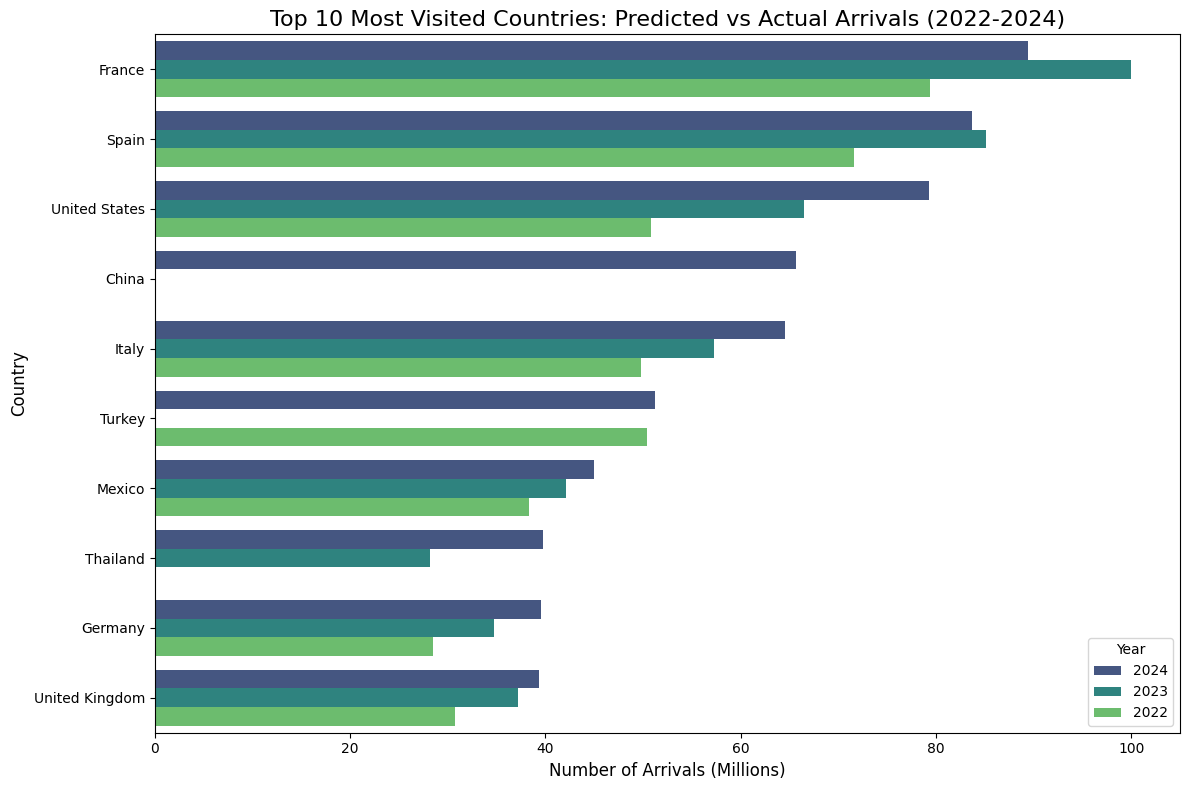

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'most-visited-countries-2024.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

# Filter the data to include only the top 10 countries by predicted arrivals for 2024
top_countries = data.nlargest(10, 'MostVisited_NumOfArrivalsPredictive_Millions_2024')

# Melt the dataframe to make it suitable for a grouped bar plot
melted_data = top_countries.melt(
    id_vars='country',
    value_vars=[
        'MostVisited_NumOfArrivalsPredictive_Millions_2024',
        'MostVisited_NumOfArrivals_Millions_2023',
        'MostVisited_NumOfArrivals_Millions_2022'
    ],
    var_name='Year',
    value_name='Arrivals (Millions)'
)

# Simplify the year labels
melted_data['Year'] = melted_data['Year'].str.extract(r'(\d{4})')

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_data, x='Arrivals (Millions)', y='country', hue='Year', palette='viridis')

# Add titles and labels
plt.title('Top 10 Most Visited Countries: Predicted vs Actual Arrivals (2022-2024)', fontsize=16)
plt.xlabel('Number of Arrivals (Millions)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title='Year', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


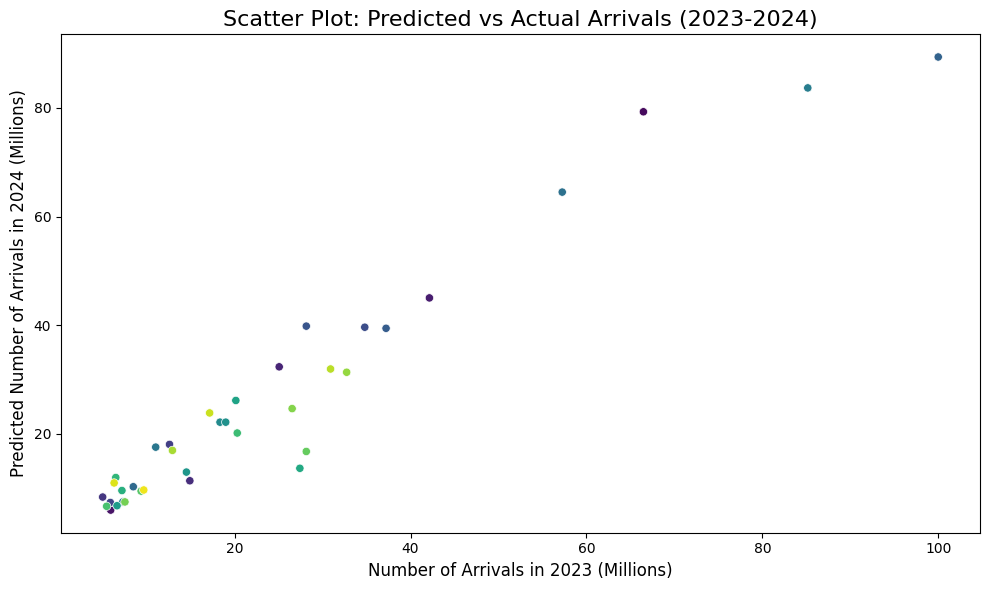

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (assuming 'data' is your DataFrame from previous code)
# If not, replace 'data' with the correct DataFrame variable name
scatter_data = data.dropna(subset=[
    'MostVisited_NumOfArrivalsPredictive_Millions_2024',
    'MostVisited_NumOfArrivals_Millions_2023'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=scatter_data,
    x='MostVisited_NumOfArrivals_Millions_2023',
    y='MostVisited_NumOfArrivalsPredictive_Millions_2024',
    hue='country',
    palette='viridis',
    legend=False  # Turn off legend for clarity
)

# Add titles and labels
plt.title('Scatter Plot: Predicted vs Actual Arrivals (2023-2024)', fontsize=16)
plt.xlabel('Number of Arrivals in 2023 (Millions)', fontsize=12)
plt.ylabel('Predicted Number of Arrivals in 2024 (Millions)', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

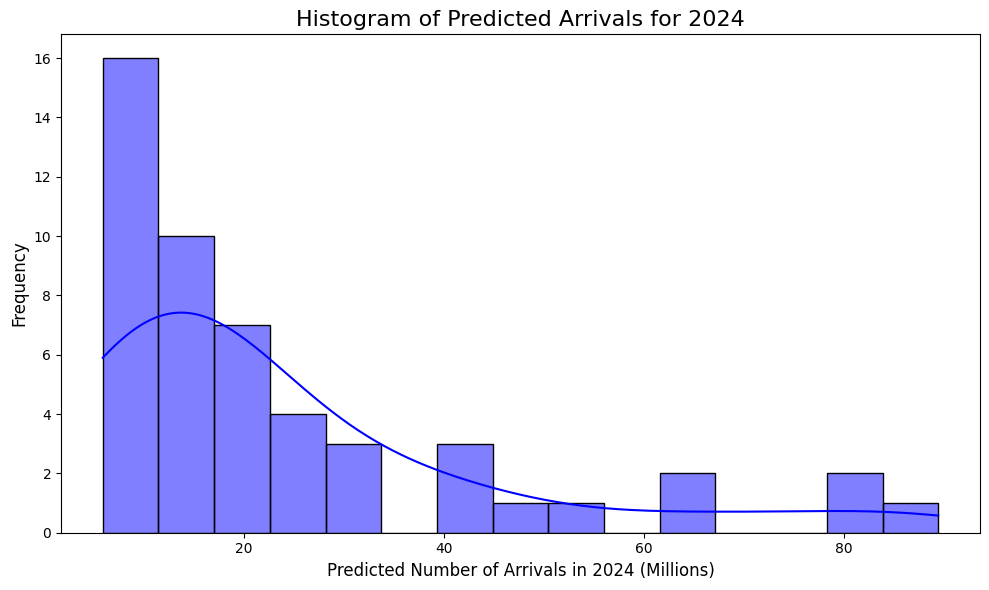

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to remove missing values for 2024 predicted arrivals
hist_data = data.dropna(subset=['MostVisited_NumOfArrivalsPredictive_Millions_2024']) # Changed new_data to data

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    data=hist_data,
    x='MostVisited_NumOfArrivalsPredictive_Millions_2024',
    bins=15,
    kde=True,
    color='blue'
)

# Add titles and labels
plt.title('Histogram of Predicted Arrivals for 2024', fontsize=16)
plt.xlabel('Predicted Number of Arrivals in 2024 (Millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

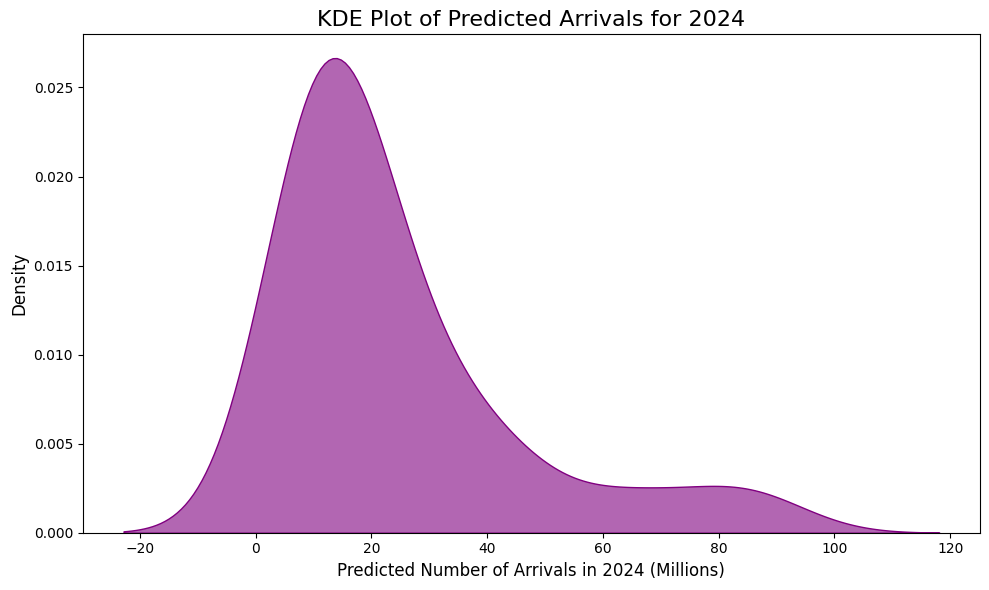

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame from the previous code.
# If you have a different DataFrame you want to use,
# replace 'data' with the correct DataFrame variable name.
kde_data = data.dropna(subset=['MostVisited_NumOfArrivalsPredictive_Millions_2024'])

# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=kde_data,
    x='MostVisited_NumOfArrivalsPredictive_Millions_2024',
    fill=True,
    color='purple',
    alpha=0.6
)

# Add titles and labels
plt.title('KDE Plot of Predicted Arrivals for 2024', fontsize=16)
plt.xlabel('Predicted Number of Arrivals in 2024 (Millions)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

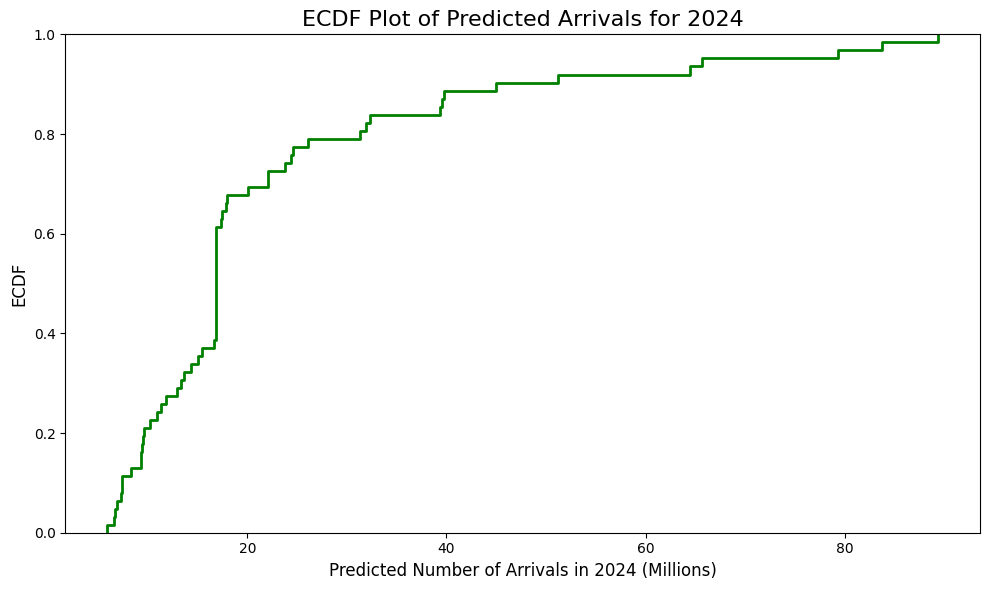

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to remove missing values for 2024 predicted arrivals
ecdf_data = data.dropna(subset=['MostVisited_NumOfArrivalsPredictive_Millions_2024']) # Changed new_data to data

# Create an ECDF plot
plt.figure(figsize=(10, 6))
sns.ecdfplot(
    data=ecdf_data,
    x='MostVisited_NumOfArrivalsPredictive_Millions_2024',
    color='green',
    linewidth=2
)

# Add titles and labels
plt.title('ECDF Plot of Predicted Arrivals for 2024', fontsize=16)
plt.xlabel('Predicted Number of Arrivals in 2024 (Millions)', fontsize=12)
plt.ylabel('ECDF', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

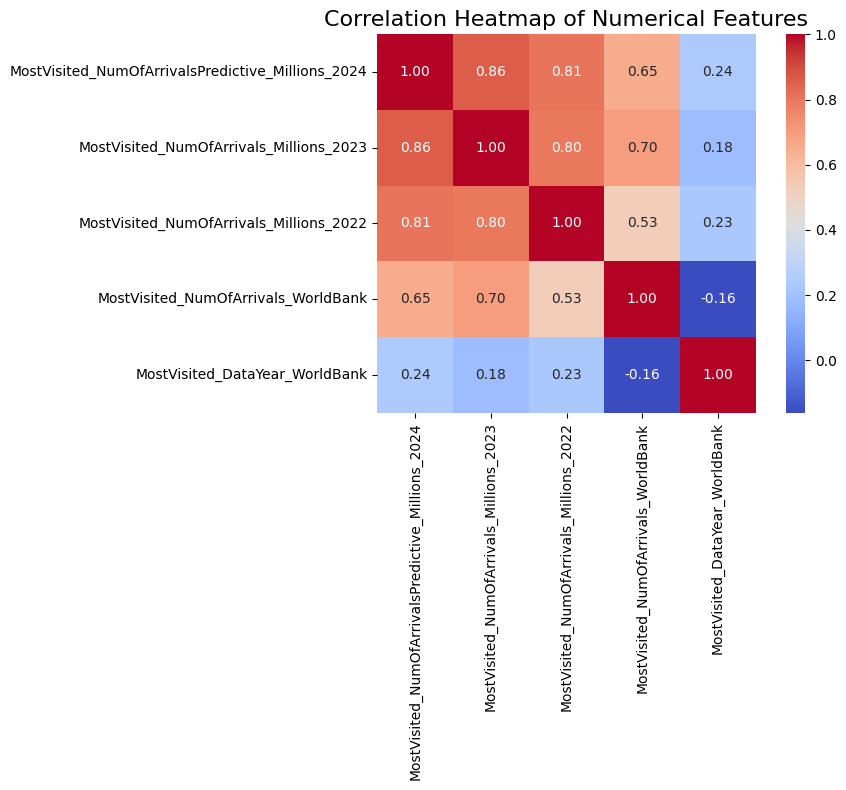

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame from the previous code.
# If you have a different DataFrame you want to use,
# replace 'data' with the correct DataFrame variable name.
correlation_matrix = data.corr(numeric_only=True) # Changed new_data to data

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Show correlation values
    fmt='.2f',   # Format to 2 decimal places
    cmap='coolwarm',  # Color map
    cbar=True,   # Show color bar
    square=True  # Keep the heatmap square
)

# Add title
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

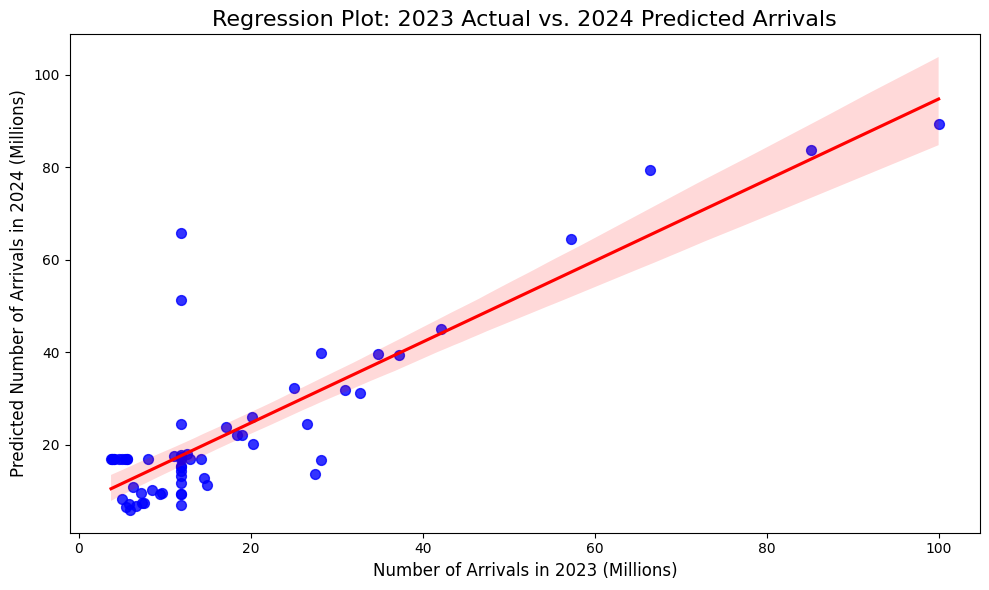

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to remove missing values for the required columns
regression_data = data.dropna(subset=[ # Changed 'new_data' to 'data'
    'MostVisited_NumOfArrivals_Millions_2023',
    'MostVisited_NumOfArrivalsPredictive_Millions_2024'
])

# Create a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=regression_data,
    x='MostVisited_NumOfArrivals_Millions_2023',
    y='MostVisited_NumOfArrivalsPredictive_Millions_2024',
    scatter_kws={'color': 'blue', 's': 50},  # Customize scatter points
    line_kws={'color': 'red'},  # Customize regression line
)

# Add titles and labels
plt.title('Regression Plot: 2023 Actual vs. 2024 Predicted Arrivals', fontsize=16)
plt.xlabel('Number of Arrivals in 2023 (Millions)', fontsize=12)
plt.ylabel('Predicted Number of Arrivals in 2024 (Millions)', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

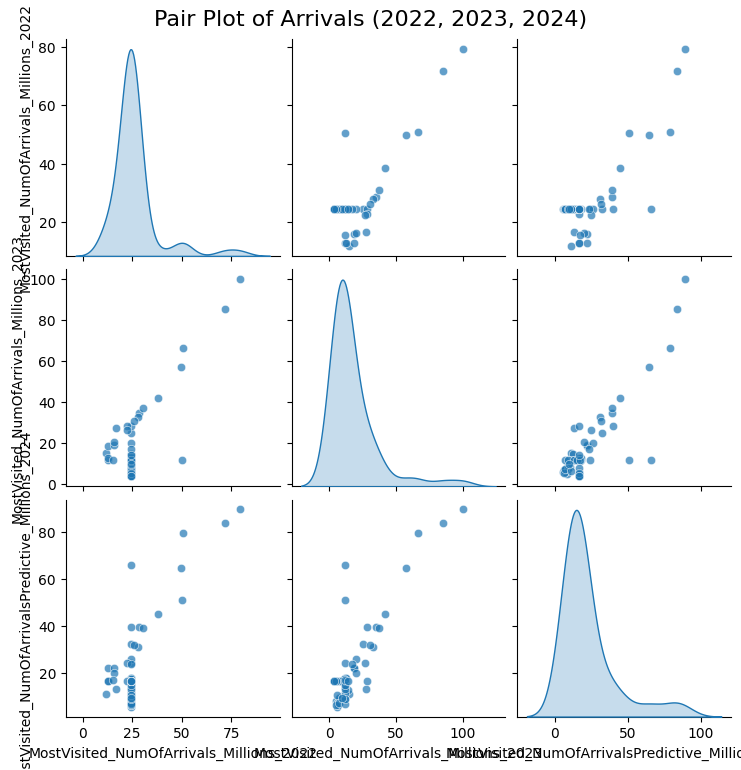

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame from the previous code.
# If you have a different DataFrame you want to use,
# replace 'data' with the correct DataFrame variable name.
pair_plot_data = data[[ # Changed 'new_data' to 'data'
    'MostVisited_NumOfArrivals_Millions_2022',
    'MostVisited_NumOfArrivals_Millions_2023',
    'MostVisited_NumOfArrivalsPredictive_Millions_2024'
]].dropna()

# Create the pair plot
sns.pairplot(
    data=pair_plot_data,
    diag_kind='kde',  # Kernel density estimation for diagonal plots
    markers='o',
    plot_kws={'alpha': 0.7},  # Adjust transparency of scatter plots
    height=2.5,
    palette='coolwarm'
)

# Add a title (use suptitle for PairGrid objects)
plt.suptitle('Pair Plot of Arrivals (2022, 2023, 2024)', y=1.02, fontsize=16)

# Show the plot
plt.show()

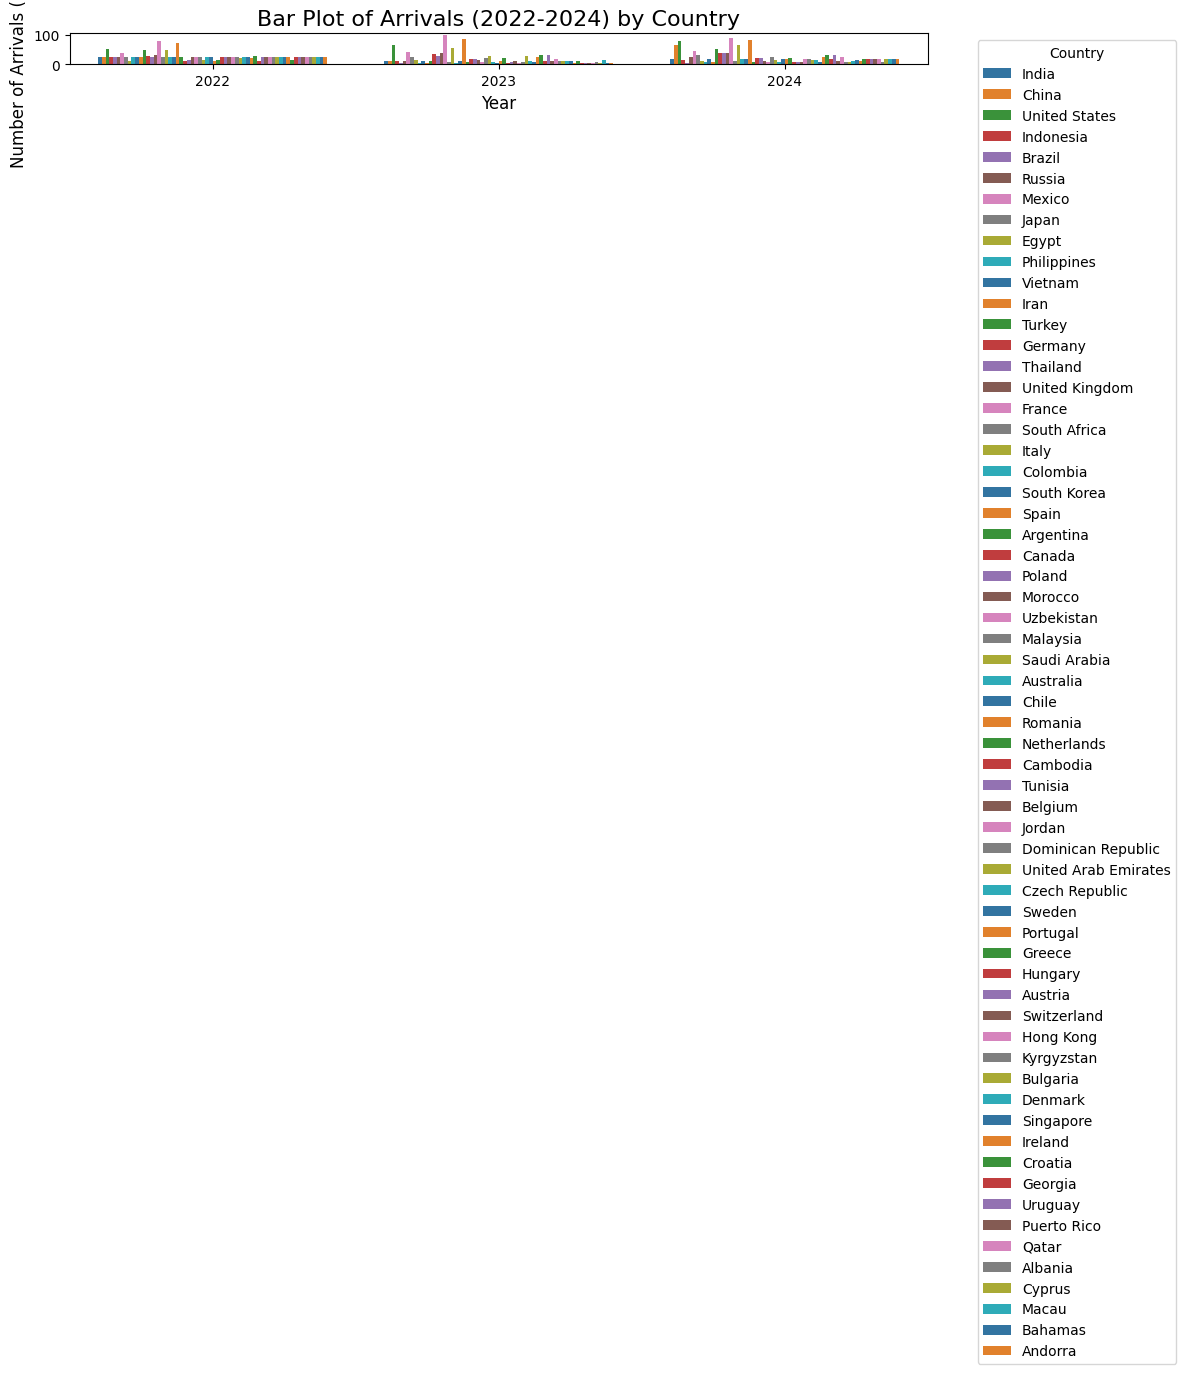

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame from the previous code.
# If you have a different DataFrame you want to use,
# replace 'data' with the correct DataFrame variable name.
bar_data = data.melt( # Changed new_data to data
    id_vars='country',
    value_vars=[
        'MostVisited_NumOfArrivals_Millions_2022',
        'MostVisited_NumOfArrivals_Millions_2023',
        'MostVisited_NumOfArrivalsPredictive_Millions_2024'
    ],
    var_name='Year',
    value_name='Arrivals (Millions)'
)

# Simplify the year labels
bar_data['Year'] = bar_data['Year'].str.extract(r'(\d{4})')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=bar_data,
    x='Year',
    y='Arrivals (Millions)',
    hue='country',
    palette='tab10'
)

# Add titles and labels
plt.title('Bar Plot of Arrivals (2022-2024) by Country', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Arrivals (Millions)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-46-3106047c6a1f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


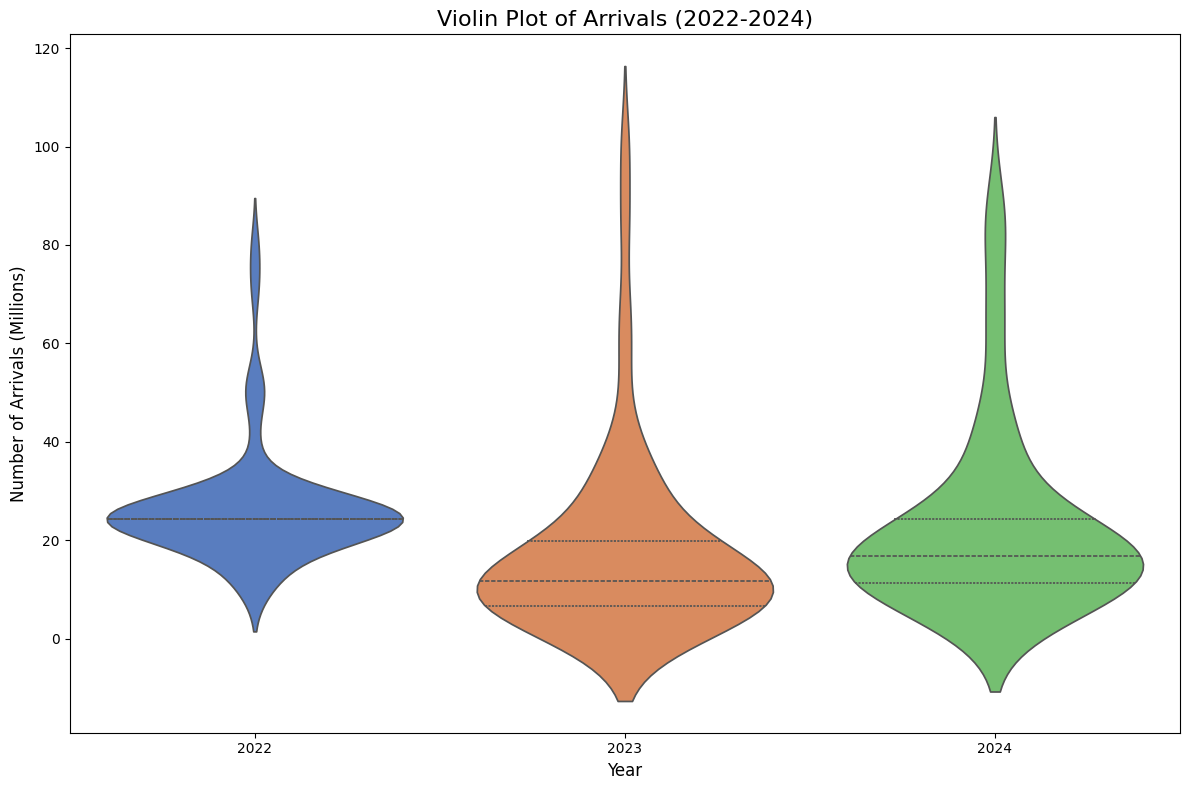

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and reshape the dataset for the violin plot
# Assuming 'data' is your DataFrame from the previous code.
# If you have a different DataFrame you want to use,
# replace 'data' with the correct DataFrame variable name.
violin_data = data.melt( # Changed 'new_data' to 'data'
    id_vars='country',
    value_vars=[
        'MostVisited_NumOfArrivals_Millions_2022',
        'MostVisited_NumOfArrivals_Millions_2023',
        'MostVisited_NumOfArrivalsPredictive_Millions_2024'
    ],
    var_name='Year',
    value_name='Arrivals (Millions)'
)

# Simplify the year labels
violin_data['Year'] = violin_data['Year'].str.extract(r'(\d{4})')

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=violin_data,
    x='Year',
    y='Arrivals (Millions)',
    palette='muted',
    inner='quartile'
)

# Add titles and labels
plt.title('Violin Plot of Arrivals (2022-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Arrivals (Millions)', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-49-40e421180c71>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


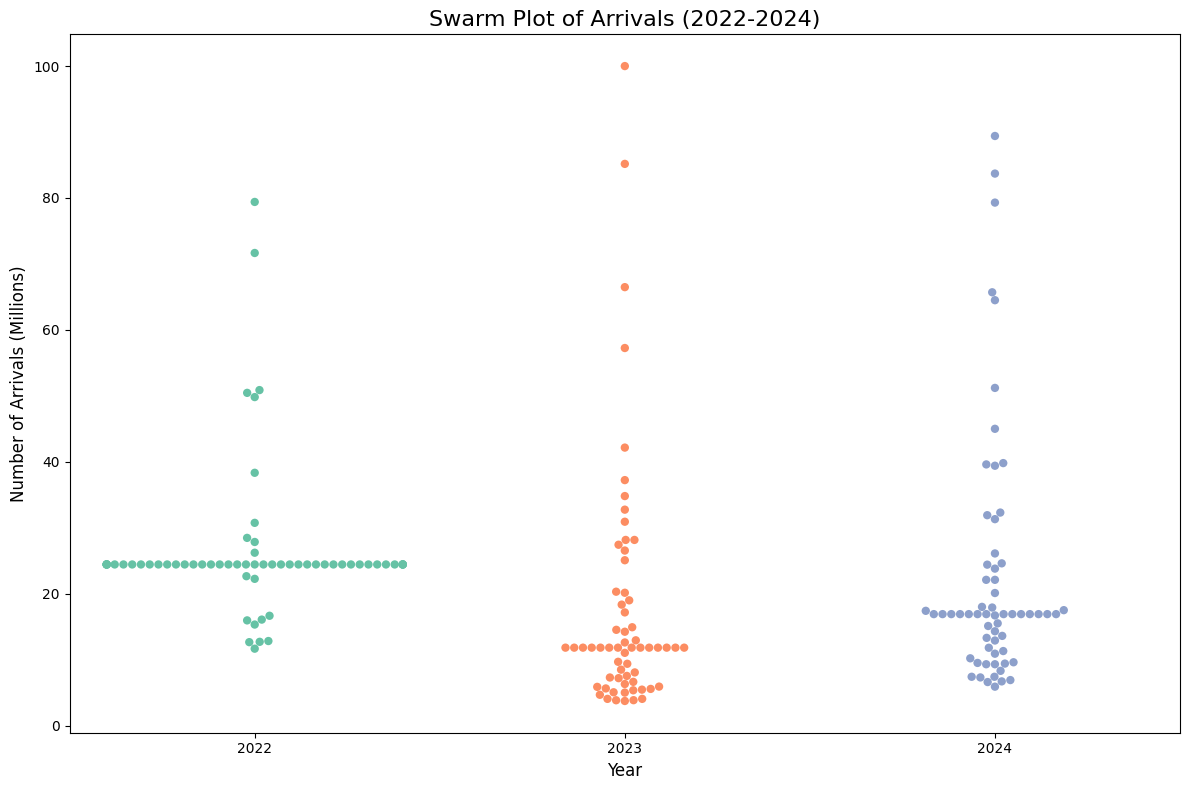

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and reshape the dataset for the swarm plot
swarm_data = data.melt( # Changed new_data to data
    id_vars='country',
    value_vars=[
        'MostVisited_NumOfArrivals_Millions_2022',
        'MostVisited_NumOfArrivals_Millions_2023',
        'MostVisited_NumOfArrivalsPredictive_Millions_2024'
    ],
    var_name='Year',
    value_name='Arrivals (Millions)'
)

# Simplify the year labels
swarm_data['Year'] = swarm_data['Year'].str.extract(r'(\d{4})')

# Create a swarm plot
plt.figure(figsize=(12, 8))
sns.swarmplot(
    data=swarm_data,
    x='Year',
    y='Arrivals (Millions)',
    palette='Set2',
    size=6  # Adjust the size of the points
)

# Add titles and labels
plt.title('Swarm Plot of Arrivals (2022-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Arrivals (Millions)', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-51-928dde5a3e7a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


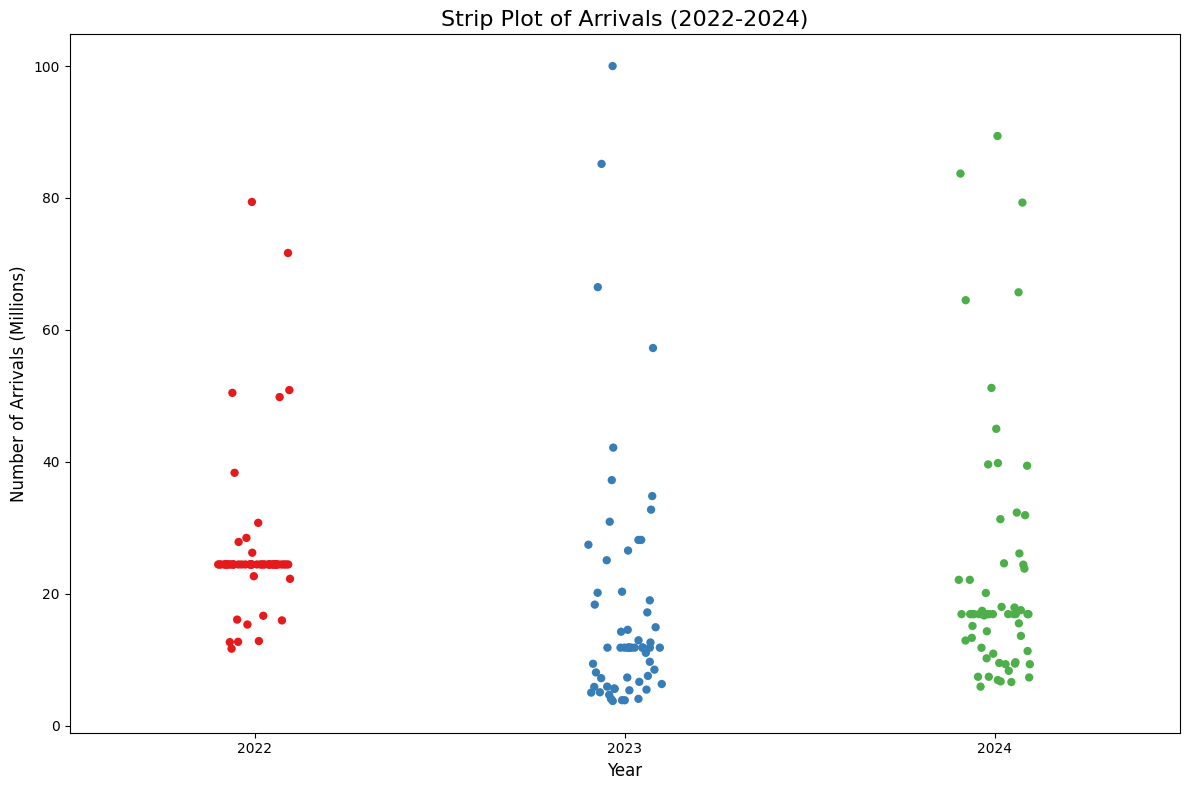

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and reshape the dataset for the strip plot
strip_data = data.melt( # Changed new_data to data
    id_vars='country',
    value_vars=[
        'MostVisited_NumOfArrivals_Millions_2022',
        'MostVisited_NumOfArrivals_Millions_2023',
        'MostVisited_NumOfArrivalsPredictive_Millions_2024'
    ],
    var_name='Year',
    value_name='Arrivals (Millions)'
)

# Simplify the year labels
strip_data['Year'] = strip_data['Year'].str.extract(r'(\d{4})')

# Create a strip plot
plt.figure(figsize=(12, 8))
sns.stripplot(
    data=strip_data,
    x='Year',
    y='Arrivals (Millions)',
    palette='Set1',
    jitter=True,  # Adds jitter to spread out overlapping points
    size=6  # Adjust the size of the points
)

# Add titles and labels
plt.title('Strip Plot of Arrivals (2022-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Arrivals (Millions)', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

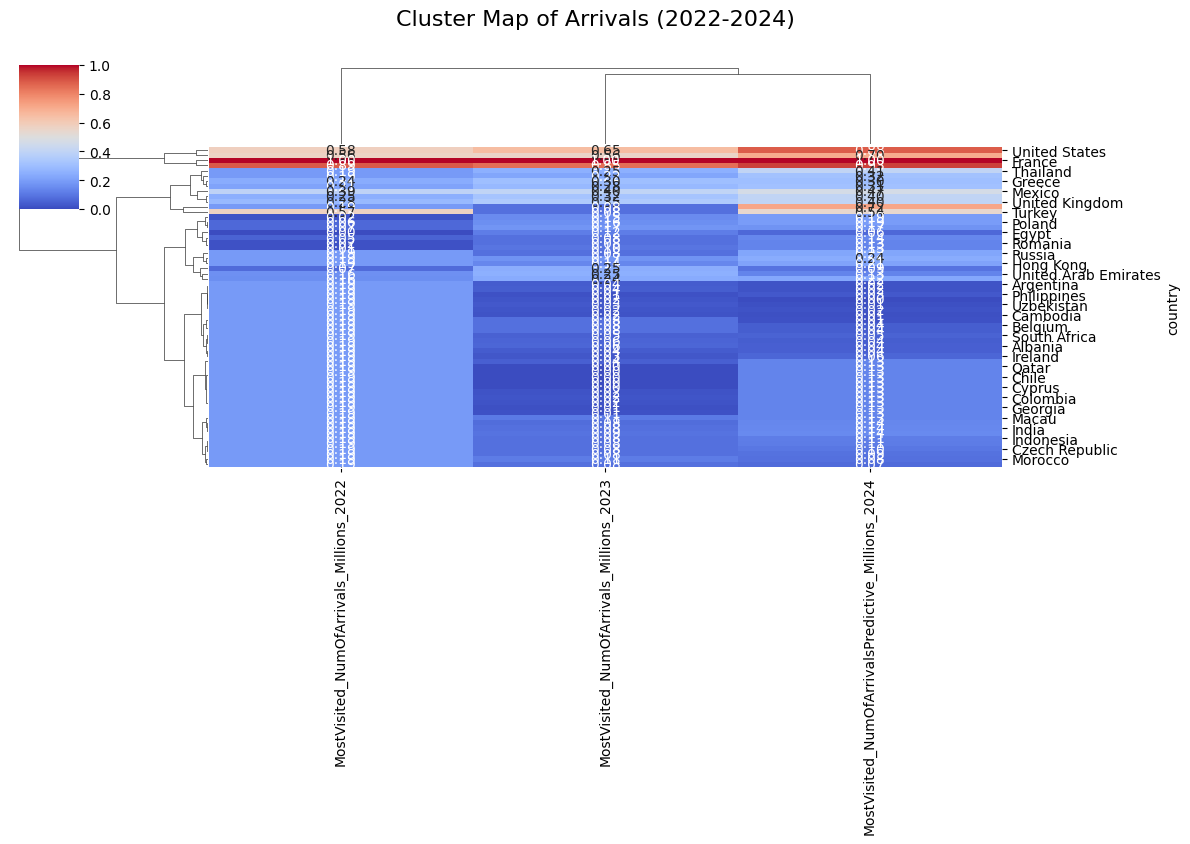

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for the cluster map
cluster_data = data.set_index('country')[[ # Changed 'new_data' to 'data'
    'MostVisited_NumOfArrivals_Millions_2022',
    'MostVisited_NumOfArrivals_Millions_2023',
    'MostVisited_NumOfArrivalsPredictive_Millions_2024'
]].dropna()

# Create a cluster map
sns.clustermap(
    data=cluster_data,
    method='ward',  # Linkage method for hierarchical clustering
    metric='euclidean',  # Distance metric
    cmap='coolwarm',  # Color map
    figsize=(12, 8),
    standard_scale=1,  # Normalize rows for better comparison
    annot=True,  # Display data values on the heatmap
    fmt='.2f'
)

# Add title (use plt.gcf().suptitle for clustermap objects)
plt.gcf().suptitle('Cluster Map of Arrivals (2022-2024)', y=1.05, fontsize=16)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

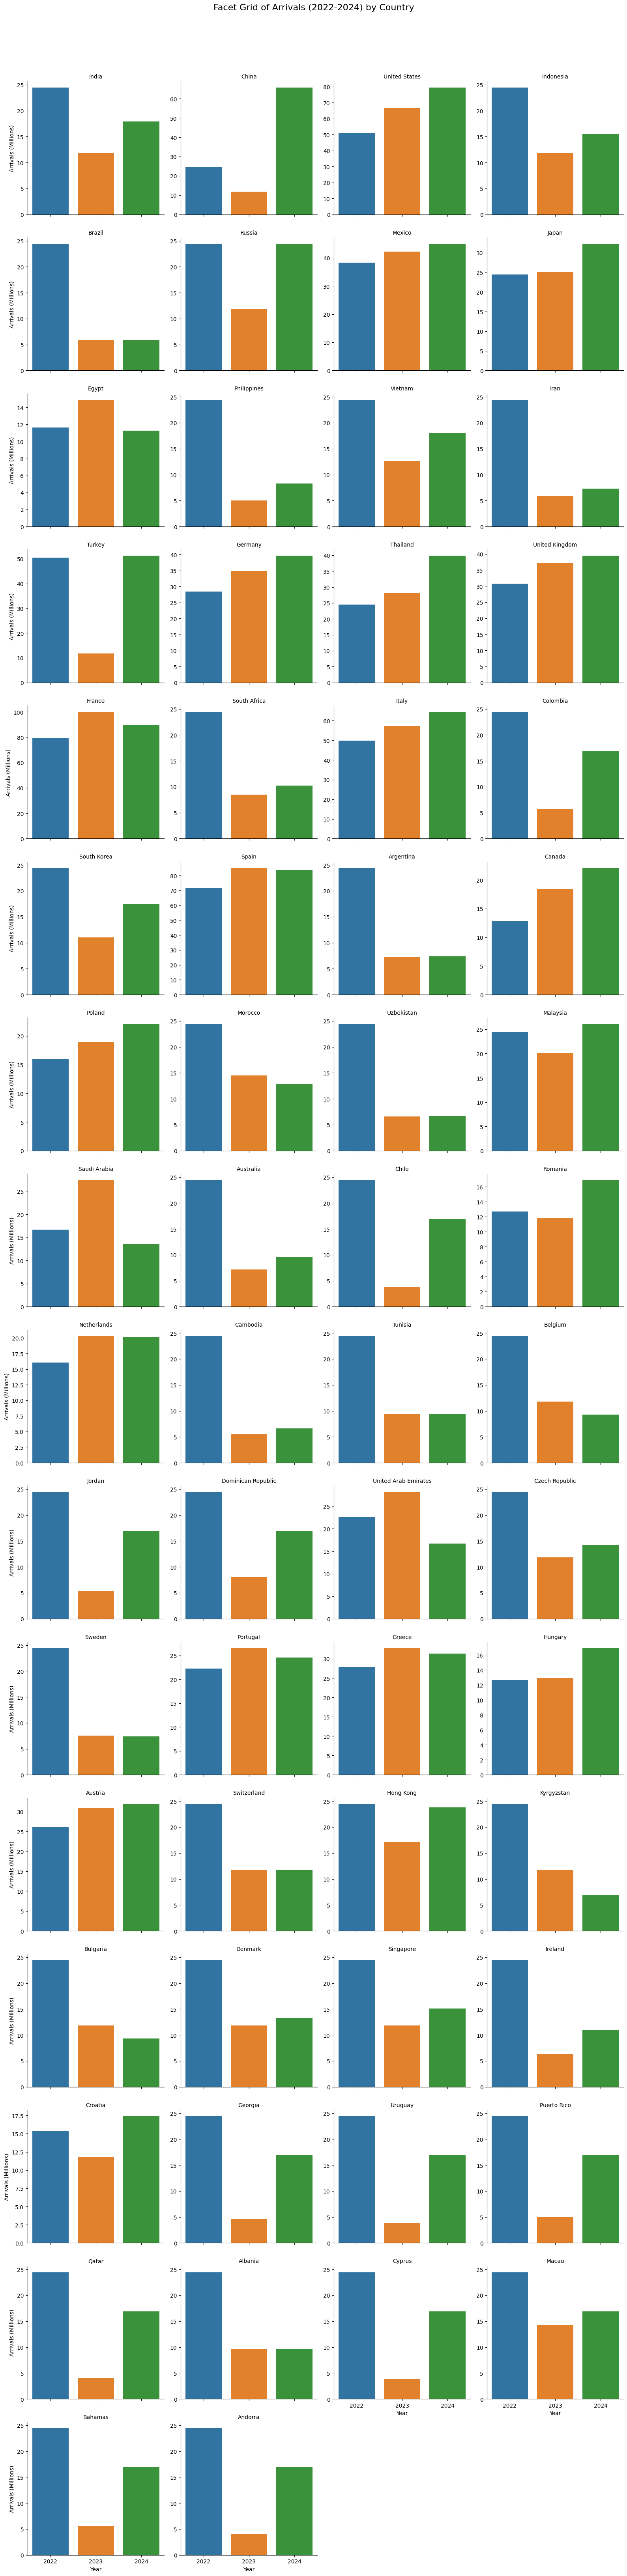

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and reshape the dataset for FacetGrid
facet_data = data.melt( # Changed 'new_data' to 'data'
    id_vars='country',
    value_vars=[
        'MostVisited_NumOfArrivals_Millions_2022',
        'MostVisited_NumOfArrivals_Millions_2023',
        'MostVisited_NumOfArrivalsPredictive_Millions_2024'
    ],
    var_name='Year',
    value_name='Arrivals (Millions)'
)

# Simplify the year labels
facet_data['Year'] = facet_data['Year'].str.extract(r'(\d{4})')

# Create the FacetGrid
g = sns.FacetGrid(
    data=facet_data,
    col='country',  # Create a plot for each country
    col_wrap=4,     # Wrap plots into rows of 4
    height=4,       # Height of each plot
    sharey=False    # Allow independent y-axes for better visibility
)

# Map a bar plot onto the grid
g.map(sns.barplot, 'Year', 'Arrivals (Millions)', order=['2022', '2023', '2024'], palette='tab10')

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Arrivals (Millions)")
g.fig.suptitle('Facet Grid of Arrivals (2022-2024) by Country', fontsize=16, y=1.02)

# Show the plot
plt.tight_layout()
plt.show()

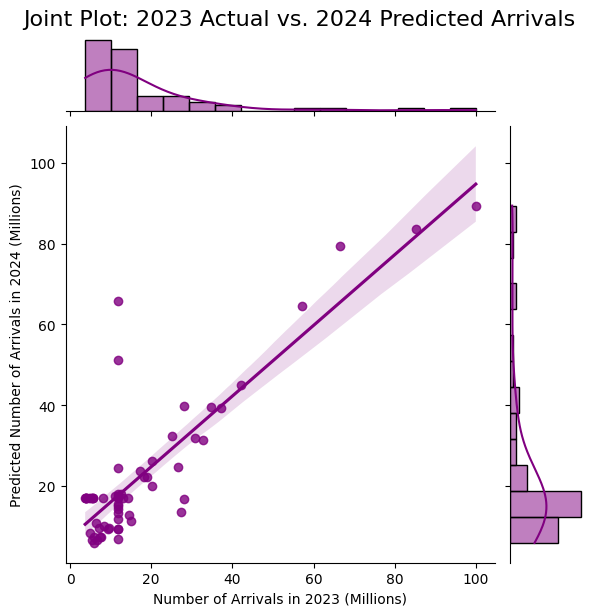

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame from the previous code.
# If you have a different DataFrame you want to use,
# replace 'data' with the correct DataFrame variable name.
joint_data = data.dropna(subset=[ # Changed 'new_data' to 'data'
    'MostVisited_NumOfArrivals_Millions_2023',
    'MostVisited_NumOfArrivalsPredictive_Millions_2024'
])

# Create the joint plot
sns.jointplot(
    data=joint_data,
    x='MostVisited_NumOfArrivals_Millions_2023',
    y='MostVisited_NumOfArrivalsPredictive_Millions_2024',
    kind='reg',  # Scatter plot with regression line
    marginal_kws={'kde': True, 'fill': True},  # KDE with fill on marginals
    color='purple'
)

# Add titles and labels
plt.suptitle('Joint Plot: 2023 Actual vs. 2024 Predicted Arrivals', y=1.02, fontsize=16)
plt.xlabel('Number of Arrivals in 2023 (Millions)')
plt.ylabel('Predicted Number of Arrivals in 2024 (Millions)')

# Show the plot
plt.show()